<a href="https://colab.research.google.com/github/KaremMeza/Hydrolearn-Module-/blob/main/Landsat8__NDVI_T_Times_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalized Difference Vegetation Index (NDVI) and Thermal Band - Time Series
# Modena

### SATELLITE: Landsat 8 Surface Reflectance Tier 1 
(https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR#description)

##  Packages

###  geemap

The geemap is a Python package for interactive mapping with Google Earth Engine (GEE), which is a cloud computing platform with a multi-petabyte catalog of satellite imagery and geospatial datasets. During the past few years, GEE has become very popular in the geospatial community and it has empowered numerous environmental applications at local, regional, and global scales. GEE provides both JavaScript and Python APIs for making computational requests to the Earth Engine servers. Compared with the comprehensive documentation and interactive IDE (i.e., GEE JavaScript Code Editor) of the GEE JavaScript API, the GEE Python API has relatively little documentation and limited functionality for visualizing results interactively. The geemap Python package was created to fill this gap. It is built upon ipyleaflet and ipywidgets, and enables users to analyze and visualize Earth Engine datasets interactively within a Jupyter-based environment (https://github.com/giswqs/geemap) .

### eemont

The eemont package extends the Google Earth Engine Python API with pre-processing and processing tools for the most used satellite platforms by adding utility methods for different Earth Engine Objects that are friendly with the Python method chaining (https://github.com/davemlz/eemont).

###  geetools

The geetools contain functions and methods related to Google Earth Engine exclusively (https://github.com/gee-community/gee_tools)

## 1.  Install and import the following packages 

In [1]:
 !pip install geemap
 !pip install eemont
 !pip install geetools
 !pip install -U geemap
 !pip install -U eemont

     |████████████████████████████████| 1.9 MB 3.3 MB/s 
     |████████████████████████████████| 98 kB 3.1 MB/s 
     |████████████████████████████████| 76 kB 2.7 MB/s 
     |████████████████████████████████| 1.2 MB 20.7 MB/s 
     |████████████████████████████████| 8.6 MB 35.0 MB/s 
     |████████████████████████████████| 216 kB 46.1 MB/s 
     |████████████████████████████████| 130 kB 47.7 MB/s 
     |████████████████████████████████| 95 kB 2.0 MB/s 
     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 1.3 MB 36.7 MB/s 
     |████████████████████████████████| 1.7 MB 35.3 MB/s 
     |████████████████████████████████| 3.3 MB 11.1 MB/s 
     |████████████████████████████████| 219 kB 40.3 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 61 kB 7.9 MB/s 
     |████████████████████████████████| 396 kB 54.2 MB/s 
     |████████████████████████████████| 428 kB 53.9 MB/s 
     |█████████████████████

     |████████████████████████████████| 116 kB 4.9 MB/s 
     |████████████████████████████████| 165 kB 35.9 MB/s 
  Created wheel for eemont: filename=eemont-0.3.0-py3-none-any.whl size=116909 sha256=e0e95a63a301c300906ce176b54e588dea2955bdcf9dc73c6a64340937f8fb4c
  Stored in directory: /root/.cache/pip/wheels/dc/d7/f7/c1f7cc748e03d7184321c7d83785c4076c74c96f878c9b6a36
  Created wheel for ee-extra: filename=ee_extra-0.0.9-py3-none-any.whl size=174156 sha256=bb418c001ac94ac951faa991ee1c91413946061a7e0cc563d7a3f1f229202693
  Stored in directory: /root/.cache/pip/wheels/c7/2a/f2/072818a085226599bf844cb3c9b3e40758d182f55040a8afba
Successfully built eemont ee-extra
     |████████████████████████████████| 74 kB 1.8 MB/s 
  Created wheel for geetools: filename=geetools-0.6.14-py3-none-any.whl size=92105 sha256=fbbddf30c4208249210d9c3898cad8c641d941d1678aa755f504374708db089d
  Stored in directory: /root/.cache/pip/wheels/5c/55/29/0a09dcf6b39bba8c890e40171cac3e3607a5c4b354b7e9447c
Successfully

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ee, eemont, geemap
# import geetools for cloud /sadow discrimination
from geetools import ui, cloud_mask

## 2. Create an interactive map

In [3]:
# Create an interactive map
Map = geemap.Map() # from ipygee

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=IHJTG6j_39Q6bu4Reamr6GzEDWAdlGZ-67TvSoPf8Dg&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWhdjuQ41IaUvgPYmIxnlDzSYrJUxqcYf_K-hGrCG0noxGueTA6Ox3c

Successfully saved authorization token.


## 3. Select Irrigation Area (Pivot)

In [4]:
# Center-pivot crops in Utah - Modena
# Coordinates:-113.816479,37.754566
# The number in buffer is the radius for the center pivot
pivot=ee.Geometry.Point([-113.816479,37.754566]).buffer(400)
pivot = ee.FeatureCollection([
    ee.Feature(pivot,{'pivot':0})   
])
Map.addLayer(pivot,{},'pivot')
Map.centerObject(pivot,16)
Map

Map(center=[37.75456641039289, -113.81647898558589], controls=(WidgetControl(options=['position', 'transparent…

## 4. Pre - process and process image collection, LANDSAT 8

In [5]:
L8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterBounds(pivot)

In [6]:
# CLOUD MASKING IN EE PYTHON NOT QUITE EASY. USING THE GEETOOLS custom functions https://github.com/gee-community/gee_tools 
# this function only for Landsat 8 Surface Corrected single image
mask_l8SR_all = cloud_mask.landsatSR() #this function masks clouds, snow, shadows
# mask_l8SR_cloud = cloud_mask.landsatSR(['cloud'])
# mask_l8SR_shadow = cloud_mask.landsatSR(['shadow'])
# mask_l8SR_snow = cloud_mask.landsatSR(['snow'])

In [7]:
L8 = L8.map(mask_l8SR_all).scale().index(['NDVI'])

In [8]:
L8.first().bandNames().getInfo()

['B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B10',
 'B11',
 'sr_aerosol',
 'pixel_qa',
 'radsat_qa',
 'NDVI']

### 5. NDVI: Normalized Difference Vegetation Index

NOTE: check eemont repository for examples of mask Clouds, scale, and application of vegetation indexes. https://eemont.readthedocs.io/en/latest/guide/spectralIndices.html

In [9]:
collection = L8.select("NDVI").filter(ee.Filter.date('2015-04-01', '2020-01-01')).sort('system:time_start')
vis_params = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901','66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}
first_image = collection.first()
# Create an interactive map
Map2 = geemap.Map() # from ipygee
Map2.addLayer(first_image, vis_params, "NDVI_Modena")
Map2.setCenter( -113.745232,37.765380, 12)
Map2

Map(center=[37.76538, -113.745232], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBo…

### 6. Time Series  By regions 

In [10]:
ts = L8.getTimeSeriesByRegions(collection = pivot,
                               bands = ['NDVI'],
                               reducer = [ee.Reducer.mean(),ee.Reducer.median()],
                               scale = 30)

In [11]:
# Conversion to Pandas
tsPandas = geemap.ee_to_pandas(ts)
tsPandas

,date,pivot,reducer,NDVI
0,2013-03-29T18:11:42,0,mean,0.164564
1,2013-04-22T18:10:46,0,mean,0.182099
2,2013-05-24T18:11:02,0,mean,0.184315
3,2013-06-09T18:11:00,0,mean,0.163689
4,2013-06-25T18:10:56,0,mean,0.155975
...,...,...,...,...
743,2021-07-24T18:15:10,0,median,0.837945
744,2021-08-09T18:15:17,0,median,0.857615
745,2021-08-25T18:15:22,0,median,NaN
746,2021-09-10T18:15:26,0,median,NaN


What can we see here?
- There are some -9999 values in the NDVI columns. These values represent the NA values (e.g. Clouds or shadows). The -9999 can be changed by modifying the `naValue` parameter in the `getTimeSeriesByRegion` method (e.g. `naValue = -10000`).
- Multiple reducers can be used. In the output dataframe they are specified by a single column named `reducer`: mean, median.
- The date is a string that needs to be converted to a date data type.
- The attributes of the original feature collection are attached to the data frame: `pivot`.
Given this, let's curate our data frame!

In [12]:
# First, let's get rid of the -9999 value:
tsPandas[tsPandas == -9999] = np.nan

In [13]:
# let's convert the date to a date data type:
tsPandas['date'] = pd.to_datetime(tsPandas['date'],infer_datetime_format = True)

In [14]:
tsPandas = pd.melt(tsPandas,
                   id_vars = ['reducer','date','pivot'],
                   value_vars = ['NDVI'],
                   var_name = 'Index',
                   value_name = 'Value')

In [15]:
# tsPandas[tsPandas['Value'] > 1] = np.nan
tsPandas[tsPandas['Value'] < 0] = np.nan
tsPandas

,reducer,date,pivot,Index,Value
0,mean,2013-03-29 18:11:42,0.0,NDVI,0.164564
1,mean,2013-04-22 18:10:46,0.0,NDVI,0.182099
2,mean,2013-05-24 18:11:02,0.0,NDVI,0.184315
3,mean,2013-06-09 18:11:00,0.0,NDVI,0.163689
4,mean,2013-06-25 18:10:56,0.0,NDVI,0.155975
...,...,...,...,...,...
743,median,2021-07-24 18:15:10,0.0,NDVI,0.837945
744,median,2021-08-09 18:15:17,0.0,NDVI,0.857615
745,median,2021-08-25 18:15:22,0.0,NDVI,NaN
746,median,2021-09-10 18:15:26,0.0,NDVI,NaN


## 7. Visualization

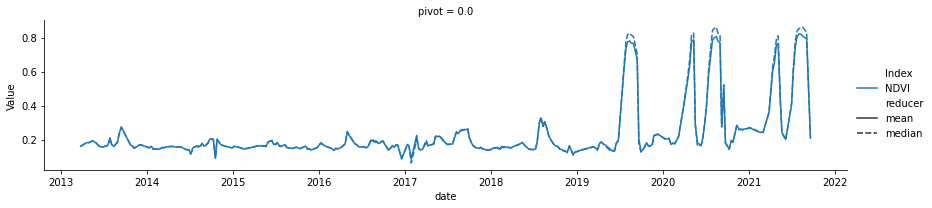

In [16]:
# Now, let's visualize our time series using `seaborn`:
g = sns.FacetGrid(tsPandas,row = 'pivot',height = 3,aspect = 4)
g.map_dataframe(sns.lineplot,x = 'date',y = 'Value',hue = 'Index',style = 'reducer')
g.add_legend()

# Thermal Infrared Bands- Time Series
# Modena

## 1.   Thermal Infrared (B11) 

In [17]:
#Let's do the same, but now for radiometric temperature (two bands, B10 and B11).
ts = L8.getTimeSeriesByRegions(collection = pivot,
                               bands = ['B11'],
                               reducer = [ee.Reducer.mean(),ee.Reducer.median()],
                               scale = 30)

In [18]:
tsPandas2 = geemap.ee_to_pandas(ts)
tsPandas2

,date,B11,pivot,reducer
0,2013-03-29T18:11:42,302.007455,0,mean
1,2013-04-22T18:10:46,305.984897,0,mean
2,2013-05-24T18:11:02,312.672595,0,mean
3,2013-06-09T18:11:00,320.944486,0,mean
4,2013-06-25T18:10:56,311.720015,0,mean
...,...,...,...,...
743,2021-07-24T18:15:10,294.000000,0,median
744,2021-08-09T18:15:17,300.300000,0,median
745,2021-08-25T18:15:22,NaN,0,median
746,2021-09-10T18:15:26,NaN,0,median


In [19]:
tsPandas2[tsPandas2 == -9999] = np.nan

tsPandas2['date'] = pd.to_datetime(tsPandas2['date'],infer_datetime_format = True)

In [20]:
tsPandas2 = pd.melt(tsPandas2,
                   id_vars = ['reducer','date','pivot'],
                   value_vars = ['B11'],
                   var_name = 'Index',
                   value_name = 'Value')

In [21]:
tsPandas2

,reducer,date,pivot,Index,Value
0,mean,2013-03-29 18:11:42,0,B11,302.007455
1,mean,2013-04-22 18:10:46,0,B11,305.984897
2,mean,2013-05-24 18:11:02,0,B11,312.672595
3,mean,2013-06-09 18:11:00,0,B11,320.944486
4,mean,2013-06-25 18:10:56,0,B11,311.720015
...,...,...,...,...,...
743,median,2021-07-24 18:15:10,0,B11,294.000000
744,median,2021-08-09 18:15:17,0,B11,300.300000
745,median,2021-08-25 18:15:22,0,B11,NaN
746,median,2021-09-10 18:15:26,0,B11,NaN


## 2. Visualization

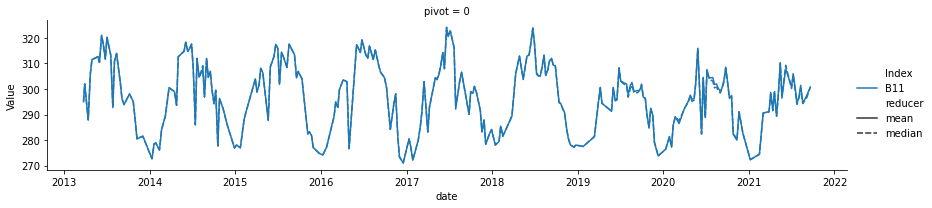

In [22]:
g = sns.FacetGrid(tsPandas2,row = 'pivot',height = 3,aspect = 4)
g.map_dataframe(sns.lineplot,x = 'date',y = 'Value',hue = 'Index',style = 'reducer')
g.add_legend()